<a href="https://colab.research.google.com/github/kaushaln1/ML_DM_labs/blob/main/MachineLearning_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Dependencies
'''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''

def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            if yval in range (1,6):
              y.append(yval)
              xvals = [float(pixel) for pixel in row[1:]]
              X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [ ]:
'''
Read training and test datasets
'''

Xdigitstrain, ydigitstrain = readData('/content/drive/MyDrive/Colab Notebooks/ZipDigits.train')

Ndigitstrain, pixels = Xdigitstrain.shape

assert(Ndigitstrain == ydigitstrain.shape[0])

Xdigitstest, ydigitstest = readData('/content/drive/MyDrive/Colab Notebooks/ZipDigits.test')

Ndigitstest, pixels = Xdigitstest.shape

assert(Ndigitstest == ydigitstest.shape[0])

X shape: (3602, 256)
y shape: (3602, 1)
X shape: (988, 256)
y shape: (988, 1)


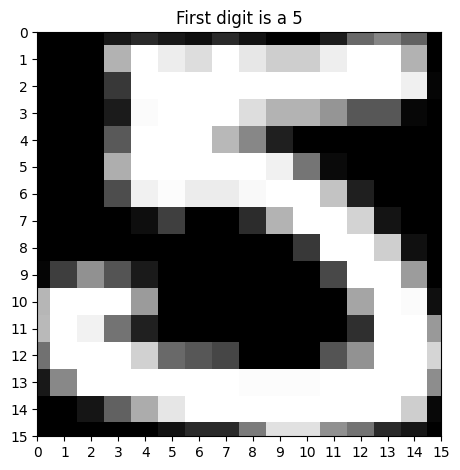

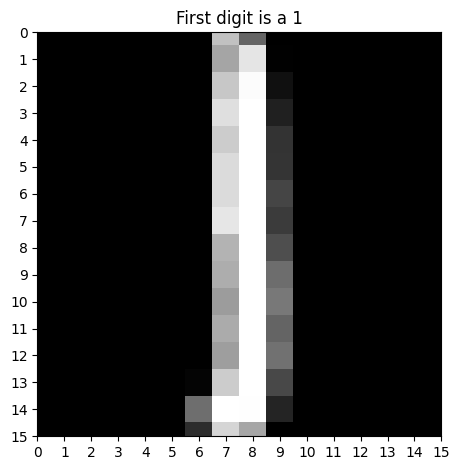

In [ ]:
'''
Show images of handwritten digits
'''
def showKthImage(X, y, k):
    image = X[k, :].reshape((16, 16))
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'First digit is a {y[k, 0]}')
    plt.xlim(0, 15)
    plt.ylim(15, 0)
    plt.xticks(range(16))
    plt.yticks(range(16))
    plt.tight_layout()
    plt.show()

showKthImage(Xdigitstrain, ydigitstrain, 0)
showKthImage(Xdigitstrain, ydigitstrain, 4)


In [ ]:
'''
Compute the augmented matrix with features
Helper Functions
'''

def computeIntensity(X):
    '''
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    '''
    TODO: Compute the intensity feature for N data points
    '''
    intensities = []
    for i in range(0,N):
      avg=sum(X[i])/d
      intensities.append(avg)

    intensities = np.array(intensities)
    intensities= intensities.reshape(N, 1)
    print(f'Output shape {intensities.shape}')

    return intensities


def computeSymmetry(X):
    '''
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    '''
    TODO: Compute the symmetry feature for N data points
    '''

    Ximgs = np.array(Ximgs)
    Ximgs_flipped = np.array(Ximgs_flipped)
    #print("Shpae of X img" ,np.shape(Ximgs) , np.shape(Ximgs[0]) )
    symmetries = []
    for i in range (0, N):
      avg_absolute_diff = sum(sum(abs(np.subtract(Ximgs[i] , Ximgs_flipped[i]))))/d
      #diff_array = np.subtract(Ximgs[i],Ximgs_flipped[i])
      #avg_absolute_diff =
      symmetries.append(avg_absolute_diff)

    # for i in range(N):
    #   diff = 0
    #   for j in range(16):
    #     diff+= abs(sum(np.subtract(Ximgs[i][j],Ximgs_flipped[i][j])))
    #   symmetries.append(diff)

    symmetries = np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return -symmetries


def computeAugmentedXWithFeatures(X):
    '''
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    # print(Xaug)
    print (f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug


In [ ]:
# #test
# X= Xdigitstrain
# print('computing symmetry feature')
# N, d = X.shape
# print(f'Input shape {N}, {d}')
# Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
# Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
# print(Ximgs[0][0])
# print(Ximgs_flipped[0][0])
# diff= sum(abs(np.subtract(Ximgs[0][0],Ximgs_flipped[0][0])))/256
# diff

In [ ]:
'''
Compute the augmented matrix with features
'''

print('Computing augmented training feature matrix')

Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

Naugtrain, d = Xaugtrain.shape

print('Computing augmented test feature matrix')

Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 3602, 256
Output shape (3602, 1)
computing symmetry feature
Input shape 3602, 256
Output shape (3602, 1)
Shape of augmented feature matrix: (3602, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 988, 256
Output shape (988, 1)
computing symmetry feature
Input shape 988, 256
Output shape (988, 1)
Shape of augmented feature matrix: (988, 3)


In [ ]:
'''
Create the dataset wih digits 1 and 5
'''

def indexDigits(y):
    '''
    Input:
        y: N x 1 2 dimensional numpy array; labels for handwritten digits
    Output:
        digit_idxs: a dictionary; the keys are digits 0 -- 9
                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k
    '''
    N = y.shape[0]
    digit_idxs = {}
    for n in range(N):
        digit = ydigitstrain[n, 0]
        if not digit in digit_idxs:
            digit_idxs[digit] = []
        digit_idxs[digit].append(n)
    return digit_idxs


In [ ]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

digit_idxs_train = indexDigits(Xaugtrain)
X1train = Xaugtrain[digit_idxs_train[1], :]
N1train = X1train.shape[0]
print(f'number of 1s: {N1train}')
X5train = Xaugtrain[digit_idxs_train[5], :]
N5train = X5train.shape[0]
print(f'number of 5s: {N5train}')
Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]
ytrain = np.concatenate((np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)
Ntrain, d = Xtrain.shape
print(f'number of 1s and 5s: {Ntrain}')
print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')


digit_idxs_test = indexDigits(Xaugtest)

X1test = Xaugtest[digit_idxs_test[1], :]
X5test = Xaugtest[digit_idxs_test[5], :]

Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
ytest = np.concatenate((np.ones((len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)
Ntest, d = Xtest.shape
print(f'number of 1s and 5s: {Ntest}')
print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')


number of 1s: 1005
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)
number of 1s and 5s: 458
Xtest shape: (458, 3), ytest shape: (458, 1)


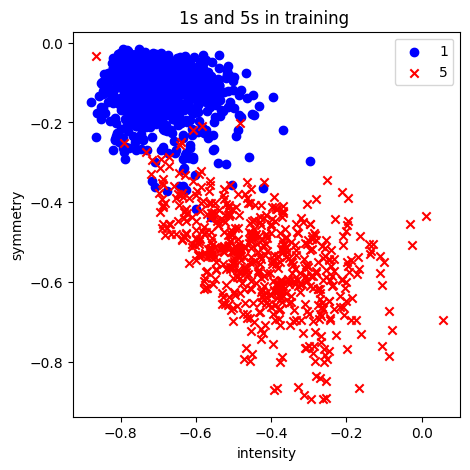

In [ ]:
'''
Plot the training data
'''

fig, axs = plt.subplots(figsize=(5,5))
axs.scatter(X1train[:, 1], X1train[:, 2], marker='o', color='blue', label='1')
axs.scatter(X5train[:, 1], X5train[:, 2], marker='x', color='red', label = '5')
axs.set_xlabel('intensity')
axs.set_ylabel('symmetry')
#axs.set_xlim(-1, 0.2)
#axs.set_ylim(1, 2)
axs.set_title('1s and 5s in training ')
axs.legend()

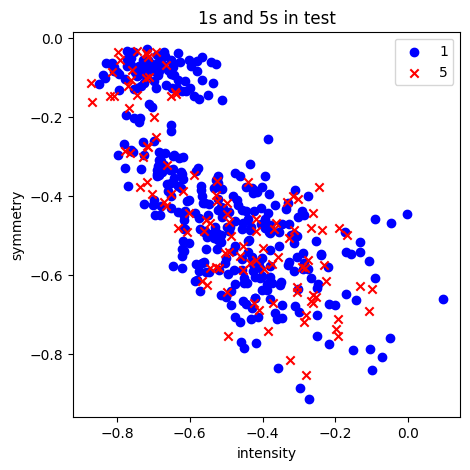

In [ ]:
# plot test data
fig, axs = plt.subplots(figsize=(5,5))
axs.scatter(X1test[:, 1], X1test[:, 2], marker='o', color='blue', label='1')
axs.scatter(X5test[:, 1], X5test[:, 2], marker='x', color='red', label = '5')
axs.set_xlabel('intensity')
axs.set_ylabel('symmetry')
#axs.set_xlim(-1, 0.2)
#axs.set_ylim(1, 2)
axs.set_title('1s and 5s in test')
axs.legend()

In [ ]:
'''
Functions to compute the misclassification error
'''

totse= 0.0
def error(w, x, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2 dimensional numpy array
        x: a d x 1 2 dimensional numpy array
        y: a scalar value
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data point x with true label y
    '''
    '''
    TODO: compute the error made by hypothesis with weights w on data point x with label y
    '''
    N = x.shape[0]
    '''
    TODO: Compute the (average) misclassification error of the linear model with weights w
    on the data points in the data set X whose labels are in y
    yhat = ?
    error = ?
    '''
    total_error = 0.0

    for i in range(N):
      x= X[i,:]
      yValue= y[i]           ##expected value
      wT=np.transpose(w)
      yhat = np.sign(np.dot(wT,x))   ## actual value
      if yhat != yValue:
        total_error += 1.0

    average_error = total_error / N    #Error total misclassfied points / total points


    return average_error


def E(w, X, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: an N x 1 2 dimensional numpy array
               misclassification errors of hypothesis w on data points in X with true labels y
    '''
    # print(f'w shape {w.shape}, X shape {X.shape}, y shape {y.shape}')
    N = X.shape[0]
    '''
    TODO: compute the errors made by hypothesis with weights w on data points in X with true labels y
    '''
    total_error = 0.0
    se = 0.0
    for i in range(N):
        x= X[i,:]
        yValue= y[i]           ##expected value
        wT=np.transpose(w)
        yhat = np.sign(np.dot(wT,x))   ## actual value
        se+= (yhat - yValue)**2
        if yhat != yValue:
          total_error += 1.0

    average_error = total_error / N
    return average_error



In [ ]:
'''
Helper function to plot a linear separator
'''

def plotLinearSeparator(w, X, y, title=''):
    '''
    Plot data points a linear separator
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    fig, axs = plt.subplots(figsize=(5,5))
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o', color='blue', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2], marker='x', color='red', label = '5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    #axs.set_xlim(-1, 0.2)
    #axs.set_ylim(0, 1e-17)
    '''
    Plot separator
    '''
    pltxs = np.linspace(-1, 0.21)
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    axs.plot(pltxs, pltys, color='green', label='separator')
    axs.set_title(title)
    axs.legend()
    plt.show()

In [ ]:
'''
The Pocket algorithm (variant of the Perceptron Learning Algorithm)
'''

def pocket(X, y, max_iters=1000, w_init=None):
    '''
    Implements the Pocket algorithm
    Input:
        X: A 2 dimensional N x d numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2 dimensional N x d numpy array
           y[i, 0] is the label associated with the i-th example
        max_iters: an integer; maximum number of iterations of PLA
        w_init: A 2 dimensional d x 1 numpy array
                intended to set initial weights for PLA
    Output:
        w_best: a d x 1 2 dimensional numpy array
                weights with lowest error on the input training set X, y
    '''
    Eins = []
    ws = []

    Ein_best = np.infty
    w_best = 0

    w = np.zeros((d, 1))
    w = w + 0.0000001
    if not isinstance(w_init, type(None)):
        w = w_init

    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        ws.append(w)
        if Ein < Ein_best:
            Ein_best = Ein
            w_best = w
        '''
        TODO: Complete this implementation of the Pocket algorithm
        '''
        yhat = np.sign(np.matmul(X, w))
        #TODO identify the misclassified samples and update weights
        ## Selecting 0 th index for misclassifications
        mis = (np.where (y != yhat)[0])
        misIndex = np.random.choice(mis)
        w = w +  (X[misIndex] * y[misIndex]).reshape(-1,1)

    plt.scatter(range(max_iters), Eins)
    plt.xlabel('iteration')
    plt.ylabel('in sample error')
    plt.title('PLA')
    plt.tight_layout()
    plt.show()

    print(f'Ein_best {Ein_best}, \nw_best \n{w_best}')

    return w_best


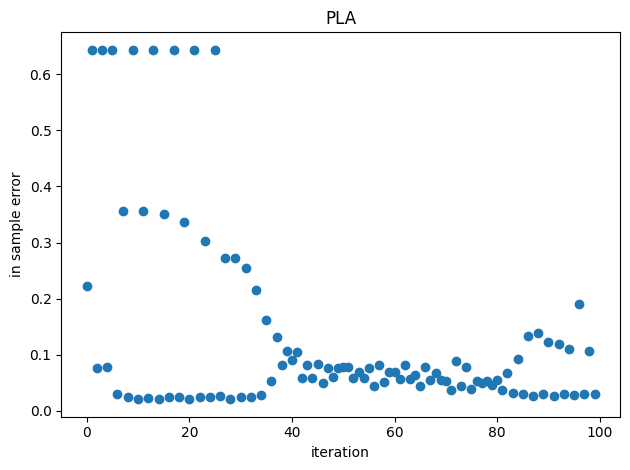

Ein_best 0.020499679692504803, 
w_best 
[[ 9.99999998e-08]
 [-6.63445213e-01]
 [ 1.35062510e+00]]


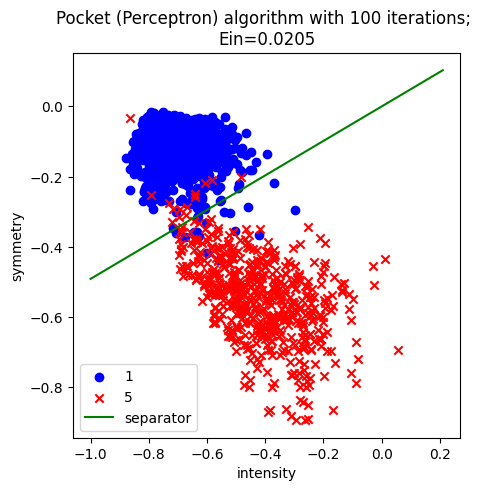

In [ ]:
'''
Run the Pocket algorithm
'''

max_iters = 100
w = pocket(Xtrain, ytrain, max_iters=max_iters)
Ein = np.round(E(w, Xtrain, ytrain),5)
plotLinearSeparator(w, Xtrain, ytrain, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')

In [ ]:
'''
The one-step optimal algorithm for Linear Regression (See LFD Section 3.2.1)
'''
def linearRegression(X, y):
    '''
    Implements the one-step algorithm for Linear Regression (See LFD Section 3.2.1)
    Input:
        X: A 2 dimensional N x d numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2 dimensional N x d numpy array
           y[i, 0] is the label associated with the i-th example
    Output:
        w: a d x 1 2 dimensional numpy array
           weights with lowest error on the input training set X, y
    '''
    '''
    TODO: Implement the one-step optimal algorithm for linear regression
    '''
    w_lin= ((np.linalg.pinv(X.T.dot(X))).dot(X.T)).dot(y)
    #w_lin = np.linalg.pinv(X.T.dot()) @ X.T @ y
    print(f'Ein {Ein}, \nw_lin \n{w_lin}')
    return w_lin

Ein 0.01922, 
w_lin 
[[ 1.0012006 ]
 [-0.42708976]
 [ 3.6520302 ]]


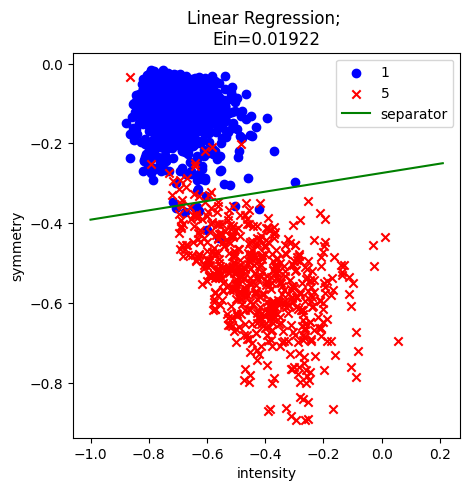

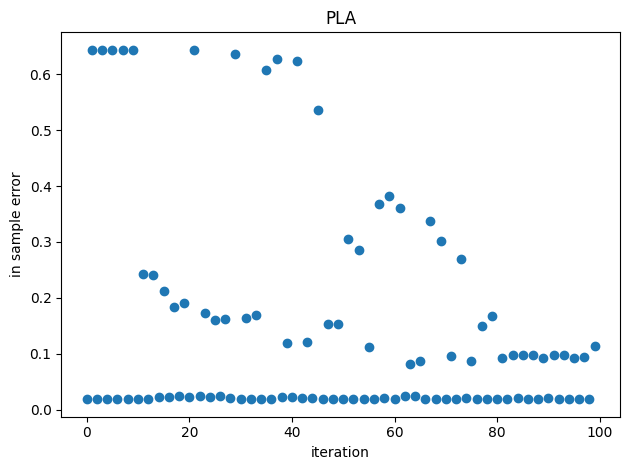

Ein_best 0.018577834721332478, 
w_best 
[[ 1.0012006 ]
 [-0.63331242]
 [ 4.23813177]]


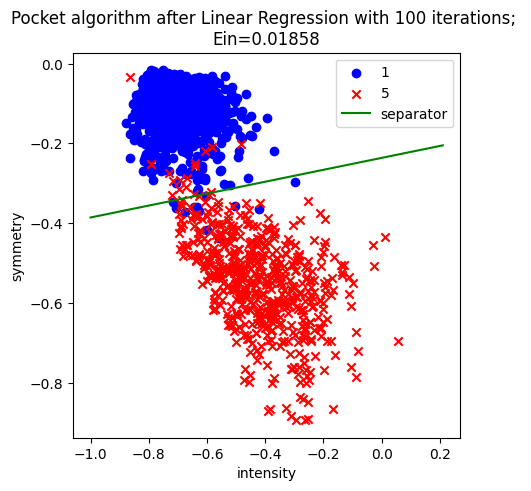

0.0

In [ ]:
'''
Run Linear Regression followed by the Pocket algorithm to classify 1s vs 5s
'''
w_lin = linearRegression(Xtrain, ytrain)
Ein = np.round(E(w_lin, Xtrain, ytrain), 5)
plotLinearSeparator(w_lin, Xtrain, ytrain, title=f'Linear Regression; \nEin={Ein}')

max_iters = 100
w = pocket(Xtrain, ytrain, w_init=w_lin, max_iters=max_iters)
Ein = np.round(E(w, Xtrain, ytrain), 5)
plotLinearSeparator(w, Xtrain, ytrain, \
                    title=f'Pocket algorithm after Linear Regression with {max_iters} iterations; \nEin={Ein}')

In [ ]:
# Linear Regression on test data to find the misclassified points (error)

error =np.sign(np.matmul(Xtest, w)) - ytest

misclassified = np.count_nonzero(error)
misclassified

265

In [ ]:
#on test data
#for testing Data
max_iters = 1000
#w = pocket(Xtest, ytest, max_iters=max_iters)
wtest = np.array([[ 3.0012006 ], [-1.23252726],  [11.8526552 ]],dtype = float)
ETest = np.round(E(wtest, Xtest, ytest),5)
plotLinearSeparator(wtest, Xtest, ytest, title=f' On test data; \nE_Test={ETest}')
ETest

array([2.34934498])

In [ ]:
'''
Gradient descent to minimize an arbitrary function
'''
#To CHECK
# import sympy as sp
# d = sp.Symbol('d')
# e = sp.Symbol('e')
# f = d**2+3*e-3
# f = lamdify(d,e,f)
# fprime_e = lamdify(d,e,f.diff(e))
# fprime_d = lamdify(d,e,f.diff(d))

def functionf(x, y):
    '''
    Computes the value of an arbitrary function in two variables at the input location
    '''
    '''
    TODO: Compute the value of the function at point x, y
    '''
    #default
    fval = 0.001*x**2+0.2*y**2-3   # function value
    # #7th question fn below
    # fval = 2*x**2+ y**2+3*(math.sin(2*math.pi*x))*(math.cos(2*math.pi*y))

    return fval


def gradientf(x, y):
    '''
    Computes the gradient of an arbitrary function in two variables at the input location
    '''
    '''
    TODO: Compute the gradient
    '''
    df_by_dx = 0.002*(x)
    df_by_dy = 0.4*y
    # pi= math.pi
    # df_by_dx = 4*x + 6*pi*(math.cos(2*pi*x))*(math.cos(2*pi*y))
    # df_by_dy= 2*(y - 3*pi*math.sin(2*pi*x)*math.sin(2*pi*y))
    return df_by_dx, df_by_dy


def gradientDescent4f(x, y, eta=0.001, max_iters=100):
    '''
    Performs gradient descent to find the location at which the value of an arbitrary function is minimized
    '''
    fvals = []
    minimumValue = np.infty
    minX = -np.infty
    minY = -np.infty
    for i in range(max_iters):
        # print(f'iteration {i}, x={x}, y={y}')
        fval = functionf(x, y)
        if (fval <minimumValue):
          minimumValue = fval
          minX = x
          minY = y
        fvals.append(fval)
        grad = gradientf(x, y)
        '''
        TODO: Complete this implementation of gradient descent for an arbitrary function f with two variables
        '''
        #update rule
        x= x+ eta*grad[0]
        y= y- eta*grad[1]
    plt.plot(range(max_iters), fvals)
    plt.xlabel('iteration')
    plt.ylabel('value of f')
    plt.show()
    print("Min Value of f " , minimumValue)
    print("minX = ", minX, " minY= ", minY)
    return x, y

max_iters = 10000
eta = 0.0001
gradientDescent4f(0.1, 0.1, eta=eta, max_iters=max_iters)

In [ ]:
'''
The Logistic Regression algorithm with the cross entropy error measure
'''

def sigmoid(s):
    '''
    Implements the sigmoid function
    '''
    return 1 / (1 + np.exp(-1*s))


def gradientCrossEntropyError(w, X, y):
    '''
    Computes the gradient of the cross entropy error function on the dataset X, y at input weights w
    See LFD Exercise 3.7
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
    Output:
        gradient: a d x 1 2 dimensional numpy array
                  gradient of the cross entropy error function on the dataset X, y at input weights w
    '''
    N, d = X.shape
    grad = np.zeros((d, 1))
    gradient =0
    for n in range(N):
        y_n = y[n, 0]
        x_n = X[n, :].reshape((d, 1))
        '''
        TODO: Complete this implementation to compute the gradient at input weights w
        '''
        y_hat = sigmoid(np.dot(w.T,x_n))
        gradient+= (y_hat- y_n) * x_n
    grad = gradient

    return grad


def logisticRegression(X, y, eta=0.001, w_init=None, max_iters=1000):
    '''
    Implements the gradient descent algorithm for Logistic Regression
    See LFD Example 3.3
    Input:
        X: A 2 dimensional N x d numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2 dimensional N x d numpy array
           y[i, 0] is the label associated with the i-th example
        eta: learning rate
        w_init: a d x 1 2 dimensional numpy array
                initial weights to start gradient descent
        max_iters: maxmimum number of iterations of gradient descent
    Output:
        w: a d x 1 2 dimensional numpy array
           weights with (approximately) lowest error on the input training set X, y
    '''
    N, d = X.shape
    w = np.zeros((d, 1))
    if not isinstance(w_init, type(None)):
        w = w_init
    Eins = []
    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        grad = gradientCrossEntropyError(w, X, y)
        '''
        TODO: Complete this implementation of the gradient descent algorithm for logistic regression
        '''
        w = w - eta * grad

    plt.plot(range(max_iters), Eins)
    return w


In [ ]:
'''
Run the logistic regression algorithm to classify 1s vs 5s
'''

max_iters = 10000
eta = 0.5
w = logisticRegression(Xtrain, ytrain, eta=eta, max_iters=max_iters)


In [ ]:
plotLinearSeparator(w, Xtrain, ytrain, title=f'Logistic Regression with {max_iters} iterations; \nEin={Ein}')

Gradient Descent Question 7

In [ ]:
gradientDescent4f(0.1, 0.1, eta=0.01, max_iters=50)

In [ ]:
gradientDescent4f(0.1, 0.1, eta=0.1, max_iters=50)

In [ ]:
gradientDescent4f(0.1, 0.1, eta=0.01, max_iters=50)

In [ ]:
gradientDescent4f(1, 1, eta=0.01, max_iters=50)

In [ ]:
gradientDescent4f(0.5, 0.5, eta=0.01, max_iters=50)

In [ ]:
gradientDescent4f(0.0, 0.5, eta=0.01, max_iters=50)

In [ ]:
gradientDescent4f(-0.5, -0.5, eta=0.01, max_iters=50)

(1561, 10) (1561, 1)
Ein [0.07944], 
w_lin 
[[  0.65603268]
 [ -3.42823675]
 [  2.15640533]
 [ -6.68092501]
 [  1.56257182]
 [-10.32598605]
 [ -3.65584901]
 [ -4.47318465]
 [  9.05288142]
 [-14.41072705]]


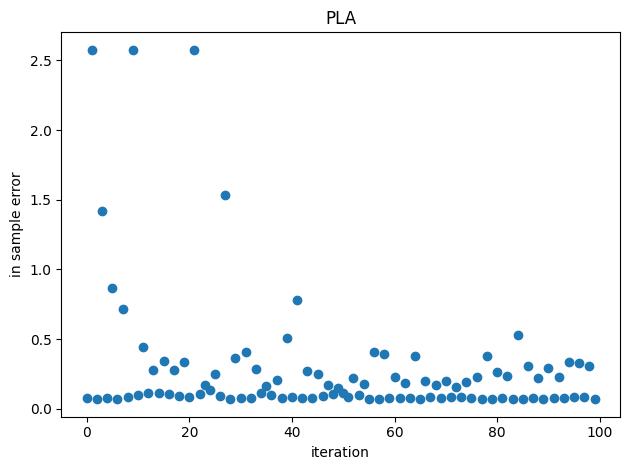

Ein_best [0.06918642], 
w_best 
[[  0.65603268]
 [ -3.434893  ]
 [  2.34432721]
 [ -6.67135868]
 [  1.42885931]
 [-10.40095514]
 [ -3.6661606 ]
 [ -4.37805117]
 [  9.10643042]
 [-14.38663697]]


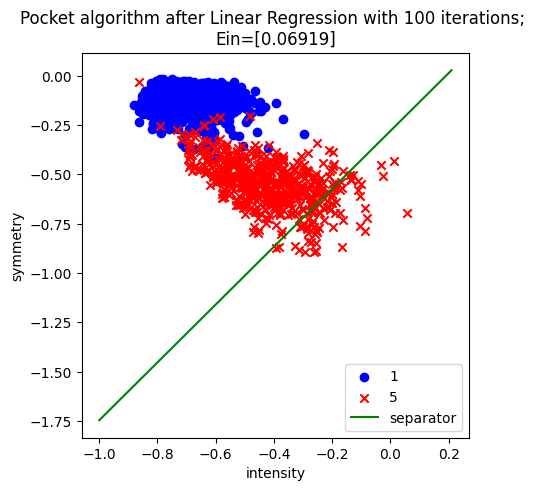

In [ ]:

# 3rd degree polynomial transform
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=3)
X_raw = Xtrain[:,-2:]
Xtrain_T = poly.fit_transform(X_raw)
print(np.shape(Xtrain_T), np.shape(ytrain))

#Xtrain_T = third_order_polynomial_transform(Xtrain)
'''
Run Linear Regression followed by the Pocket algorithm to classify 1s vs 5s
'''
w_lin = linearRegression(Xtrain_T, ytrain)
Ein = np.round(E(w_lin, Xtrain_T, ytrain), 5)
#plotLinearSeparator(w_lin, Xtrain_T, ytrain, title=f'Linear Regression; \nEin={Ein}')

max_iters = 100
w = pocket(Xtrain_T, ytrain, w_init=w_lin, max_iters=max_iters)
Ein = np.round(E(w, Xtrain_T, ytrain), 5)
plotLinearSeparator(w, Xtrain_T, ytrain, \
                    title=f'Pocket algorithm after Linear Regression with {max_iters} iterations; \nEin={Ein}')

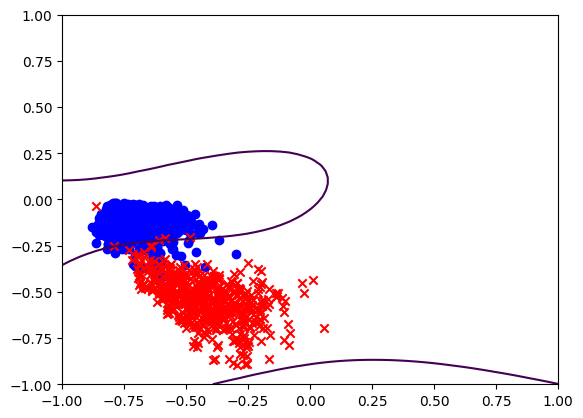

In [ ]:
def plot_poly(X,y, weights, num=60):
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    plt.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o', color='blue', label='1')
    plt.scatter(Xminus1s[:, 1], Xminus1s[:, 2], marker='x', color='red', label = '5')
    w = weights
    xx1 = np.linspace(-1, 1, num)
    xx2 = np.linspace(-1, 1, num)
    z = np.zeros((num, num))
    for i_x1, x1 in enumerate(xx1):
        for i_x2, x2 in enumerate(xx2):
            z[i_x2, i_x1] = \
                w[0]*1 + \
                w[1]*(x1) + w[2]*(x2) + \
                w[3]*(x1**2) + w[4]*(x1*x2) + w[5]*(x2**2) + \
                w[6]*(x1**3) + w[7]*(x1**2*x2) + w[8]*(x1*x2**2) +  w[9]*(x2**3)
    xx1, xx2 = np.meshgrid(xx1, xx2)
    plt.contour(xx1, xx2, z, levels=[0.5])

plot_poly(Xtrain,ytrain, w )

0.58515

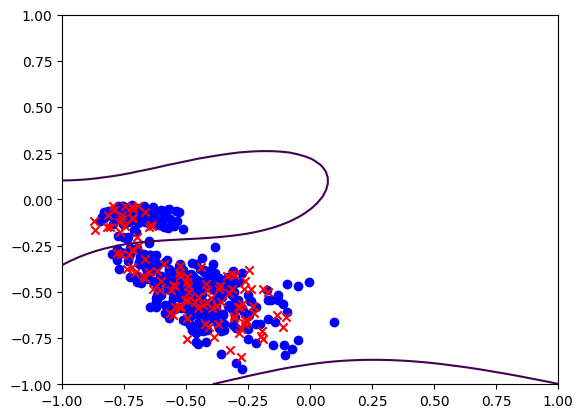

In [ ]:
plot_poly(Xtest, ytest,w)
poly = PolynomialFeatures(degree=3)
X_raw_test = Xtest[:,-2:]
Xtest_T = poly.fit_transform(X_raw_test)
E_test =  np.round(E(w, Xtest_T, ytest), 5)
E_test

6.C
bound


In [ ]:
def error_bound(err, sigma, N, argc):
  M= 1000
  bound_Eout = err + np.sqrt(1/(2*N) * np.log(2 * M / sigma))
  print(f"Bound on Eout in {argc} : {bound_Eout}")
  return bound_Eout

#using Linear Regreassion on
ETest = 0.58734
Ein   = 0.01665
N_train, d = Xtrain.shape
N_test, d = Xtest.shape
bound = error_bound(Ein, 0.05,N_train, "train")
boundEtest = error_bound (ETest, 0.05,N_test, "test")

#using 3rd degree polynomial
ETest = 0.58515
Ein =  0.017937
N_train_T, d = Xtrain_T.shape
N_test_t, d = Xtest_T.shape
poly_boundE = error_bound(Ein, 0.05, N_train_T, "3rd degree Poly train")
poly_boundE_test = error_bound(ETest, 0.05 , N_test_t, "3rd degree Poly test")

Question (Exercise 2.6)

In [ ]:
N= 400
M=1000
sigma = 0.05
penalty_train_set = np.sqrt(1/(2*N) * np.log(2 * M / sigma))
print("Error bar on train_data for N=400 ,tolerance = 0.05, Hypothesis size = 1000 is ",penalty_train_set )
N= 200
sigma = 0.05
penalty_test_set = np.sqrt(1/(2*N) * np.log(2 / sigma))
print("Error bar on test_data for N=200 ,tolerance = 0.05, Hypothesis size = 1000 is ",penalty_test_set )

Question 4 Problem 2.24

In [ ]:
def sample(lb, ub, sz):
    return lb + np.random.random_sample((sz,))*(ub-lb)

def avg_g(x, gdfunc, num_samples, targetfunc):
    bias_at_x = 0
    gd_funcs = []
    for i in range(num_samples):
        x1, x2 = sample(-1, 1, 2)
        v = gdfunc(x, x1, x2)
        gd_funcs.append(v)

    average_gfunc_at_x = np.mean(gd_funcs)
    variance_gfunc_at_x = np.var(gd_funcs)
    bias_at_x = (average_gfunc_at_x - targetfunc(x))**2
    return average_gfunc_at_x, variance_gfunc_at_x, bias_at_x

def calc_bias_var_eout(gd_func, target_func, num_data_samples, num_x_samples):
    variances, biases, eouts = [], [], []
    for i in range(num_x_samples):
        x = sample(-1, 1, 1)
        _, variance, bias = avg_g(x, gd_func, num_data_samples, target_func)
        variances.append(variance)
        biases.append(bias)
        eout_on_data = []
        for i in range(num_data_samples):
            x1, x2 = sample(-1, 1, 2)
            v= gd_func(x, x1, x2)
            eout_on_data.append((v-target_func(x))**2) # (g^{D}(x) - f(x))**2

        eout_data_avg = np.mean(eout_on_data)
        eouts.append(eout_data_avg)



    variance = np.mean(variances)
    bias = np.mean(biases)
    eout = np.mean(eouts)
    print('The variance is: ', variance)
    print('The bias is: ', bias)
    print('The expected out-of-sample error is: ', eout)
    print('The variance+bias is: ', variance+bias)


    xs = np.arange(-1, 1, 0.01)
    true_f, avg_gf, var_gf, ubs, lbs = [],[], [], [], []
    for x in xs:
        true_f.append(target_func(x))
        mean_g, var_g, bias_g = avg_g(x, gd_func, num_data_samples, target_func)
        avg_gf.append(mean_g)
        var_gf.append(var_g)
        ubs.append(mean_g + np.sqrt(var_g))
        lbs.append(mean_g - np.sqrt(var_g))

    plt.plot(xs, true_f, color='blue', label='f(x)= x**2')
    plt.plot(xs, avg_gf, color='red', label='g_bar(x)')
    legend_x = 2.0
    legend_y = 0.5
    plt.legend(['f(x)= x**2', 'g_bar(x)'])

The variance is:  0.33481421192134964
The bias is:  0.20162779266199488
The expected out-of-sample error is:  0.5382862723888302
The variance+bias is:  0.5364420045833445


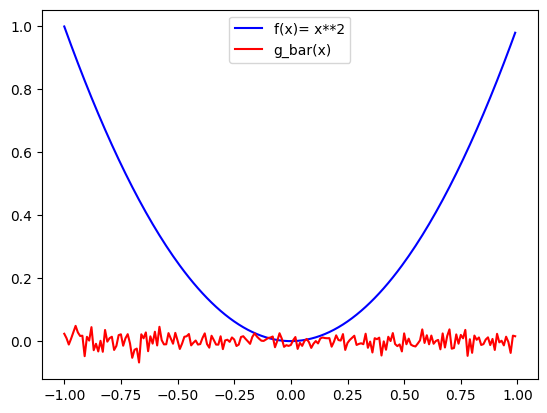

In [ ]:
num_data_samples = 1000
num_x_samples = 1000
def gd_func(x, x1, x2):
    #hypothesis found by learning algorithm
    a = x1 + x2
    b = -x1 * x2
    return a*x + b

calc_bias_var_eout(gd_func, lambda x: x**2, num_data_samples, num_x_samples)

In [ ]:
!jupyter nbconvert --to html .ipynb

[NbConvertApp] WARNING | pattern 'HW2_ML_Kaushal.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
